## PDP Plots of LR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from sklearn.inspection import partial_dependence, plot_partial_dependence
from sklearn.metrics import roc_auc_score
from pdpbox import pdp, get_dataset, info_plots


In [2]:
cc_train = pd.read_csv(r'Data/cc_train.csv')
cc_test = pd.read_csv(r'Data/cc_test.csv')

cc_train.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,LIMIT_UTIL4,PERC_PAID4,LIMIT_UTIL5,PERC_PAID5,LIMIT_UTIL6,PERC_PAID6,EXCEEDED_LIMIT,OVERPAID,NEG_BILL,default.payment.next.month
0,50000.0,0,0,0,0,0,-2,46727.0,47973.0,48990.0,...,0.985220,0.000000,0.000000,1.000000,0.000000,1.000000,0,0,0,1
1,200000.0,-1,-1,-1,-1,-1,-1,780.0,0.0,390.0,...,0.001950,1.000000,0.001950,1.000000,0.001950,1.000000,1,1,0,0
2,400000.0,0,0,-1,0,0,0,10260.0,17794.0,6402.0,...,0.051930,0.242490,0.031015,0.407384,0.027363,0.283600,1,1,0,0
3,160000.0,4,3,2,0,0,0,103398.0,100925.0,97701.0,...,0.621463,0.004345,0.622044,0.005486,0.102069,0.033678,0,0,0,0
4,10000.0,2,2,6,6,6,6,142.0,142.0,142.0,...,0.014200,0.000000,0.014200,0.000000,0.014200,0.000000,0,0,0,1


In [3]:
X_train = cc_train.drop(columns=['default.payment.next.month'])
y_train = cc_train[['default.payment.next.month']].values

X_test = cc_test.drop(columns=['default.payment.next.month'])
y_test = cc_test[['default.payment.next.month']].values

In [4]:
xgb_model = joblib.load('xgb.sav')
result = roc_auc_score(y_test, xgb_model.predict(X_test))
print(result)

0.6548841666512002


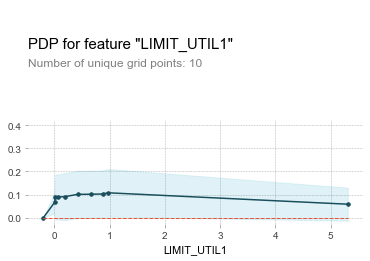

In [35]:
pdp_goals = pdp.pdp_isolate(model=xgb_model, dataset=X_test, 
                            model_features=X_test.columns, 
                            feature='LIMIT_UTIL1')

# plot it
fig_limit_util, _ = pdp.pdp_plot(pdp_goals, 'LIMIT_UTIL1', figsize=(6,4))
fig_limit_util.savefig('pdp_limitutil1_xgb.png')
plt.show()

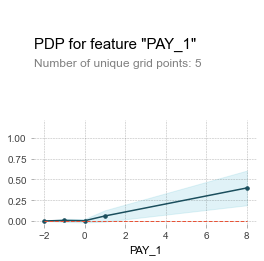

In [6]:
pdp_pay1 = pdp.pdp_isolate(model=xgb_model, dataset=X_test, 
                            model_features=X_test.columns, 
                            feature='PAY_1')

# plot it
fig_pay1,_ = pdp.pdp_plot(pdp_pay1, 'PAY_1', figsize=(4,4))
fig_pay1.savefig('pdp_pay1_xgb.png')
plt.show()

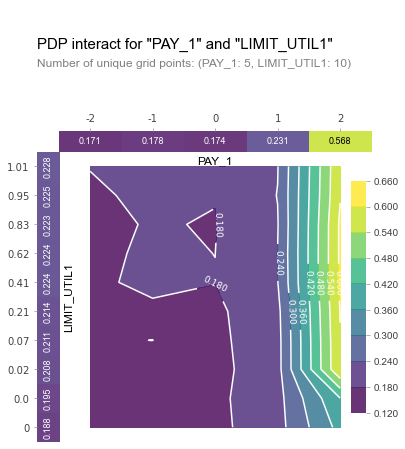

In [7]:
inter1 = pdp.pdp_interact(model=xgb_model,
                          dataset=X_test,
                          model_features=X_test.columns,
                          features=['PAY_1', 'LIMIT_UTIL1'],
                          num_grid_points=[10, 10],
                          percentile_ranges=[(5, 95), (5, 95)])
fig_inter1, axes = pdp.pdp_interact_plot(pdp_interact_out=inter1,
                                  feature_names=['PAY_1', 'LIMIT_UTIL1'],
                                  plot_type='contour',
                                  x_quantile=True,
                                  plot_pdp=True,
                                  figsize=(6,8))
fig_inter1.savefig('pdp2_Pay1_LimitUtil1_xgb.png')

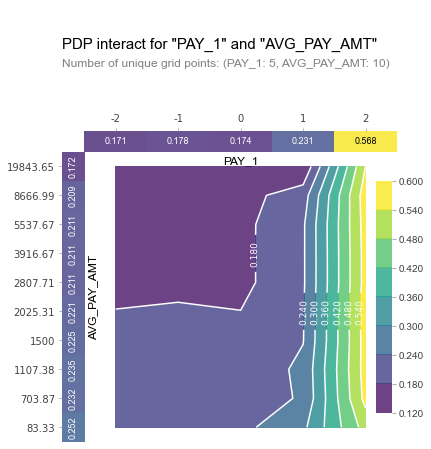

In [8]:
inter2 = pdp.pdp_interact(model=xgb_model,
                          dataset=X_test,
                          model_features=X_test.columns,
                          features=['PAY_1', 'AVG_PAY_AMT'],
                          num_grid_points=[10, 10],
                          percentile_ranges=[(5, 95), (5, 95)])
fig_inter2, axes = pdp.pdp_interact_plot(pdp_interact_out=inter2,
                                  feature_names=['PAY_1', 'AVG_PAY_AMT'],
                                  plot_type='contour',
                                  x_quantile=True,
                                  plot_pdp=True,
                                  figsize=(6,8))
fig_inter2.savefig('pdp2_Pay1_AvgPay_xgb.png')

In [28]:
help(pdp.pdp_plot)

Help on function pdp_plot in module pdpbox.pdp:

pdp_plot(pdp_isolate_out, feature_name, center=True, plot_pts_dist=False, plot_lines=False, frac_to_plot=1, cluster=False, n_cluster_centers=None, cluster_method='accurate', x_quantile=False, show_percentile=False, figsize=None, ncols=2, plot_params=None, which_classes=None)
    Plot partial dependent plot
    
    Parameters
    ----------
    
    pdp_isolate_out: (list of) instance of PDPIsolate
        for multi-class, it is a list
    feature_name: string
        name of the feature, not necessary a column name
    center: bool, default=True
        whether to center the plot
    plot_pts_dist: bool, default=False
        whether to show data points distribution
    plot_lines: bool, default=False
        whether to plot out the individual lines
    frac_to_plot: float or integer, default=1
        how many lines to plot, can be a integer or a float
    cluster: bool, default=False
        whether to cluster the individual lines and

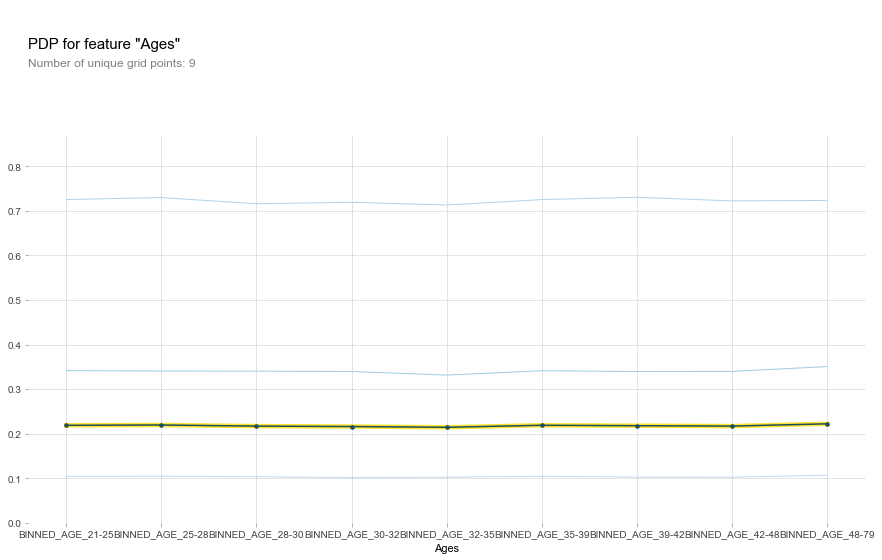

In [30]:
age_columns = ['BINNED_AGE_21-25', 'BINNED_AGE_25-28', 'BINNED_AGE_28-30', 'BINNED_AGE_30-32', 
               'BINNED_AGE_32-35', 'BINNED_AGE_35-39', 'BINNED_AGE_39-42', 'BINNED_AGE_42-48',
               'BINNED_AGE_48-79']
pdp_age = pdp.pdp_isolate(
    model=xgb_model, dataset=X_test, model_features=X_test.columns, 
    feature=age_columns
)
fig_age, axes = pdp.pdp_plot(pdp_age,'Ages', center=False, cluster=True,n_cluster_centers=3,
                         plot_lines=True, x_quantile=True, show_percentile=True)
fig_age.savefig('pdp_all_ages_xgb.png')

## PDP For RF

In [10]:
ros_train = pd.read_csv(r'Data/lr_train.csv')
ros_test = pd.read_csv(r'Data/lr_test.csv')

ros_train.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,LIMIT_UTIL4,PERC_PAID4,LIMIT_UTIL5,PERC_PAID5,LIMIT_UTIL6,PERC_PAID6,EXCEEDED_LIMIT,OVERPAID,NEG_BILL,default.payment.next.month
0,50000.0,0,0,0,0,0,-2,46727.0,47973.0,48990.0,...,0.985220,0.000000,0.000000,1.000000,0.000000,1.000000,0,0,0,1
1,200000.0,-1,-1,-1,-1,-1,-1,780.0,0.0,390.0,...,0.001950,1.000000,0.001950,1.000000,0.001950,1.000000,1,1,0,0
2,400000.0,0,0,-1,0,0,0,10260.0,17794.0,6402.0,...,0.051930,0.242490,0.031015,0.407384,0.027363,0.283600,1,1,0,0
3,160000.0,4,3,2,0,0,0,103398.0,100925.0,97701.0,...,0.621463,0.004345,0.622044,0.005486,0.102069,0.033678,0,0,0,0
4,10000.0,2,2,6,6,6,6,142.0,142.0,142.0,...,0.014200,0.000000,0.014200,0.000000,0.014200,0.000000,0,0,0,1


In [11]:
X_train_ros = ros_train.drop(columns=['default.payment.next.month'])
y_train_ros = ros_train[['default.payment.next.month']].values

X_test_ros = ros_test.drop(columns=['default.payment.next.month'])
y_test_ros = ros_test[['default.payment.next.month']].values

In [12]:
rf_model = joblib.load('rf.sav')
result = roc_auc_score(y_test_ros, rf_model.predict(X_test_ros))
print(result)

0.707972651077373


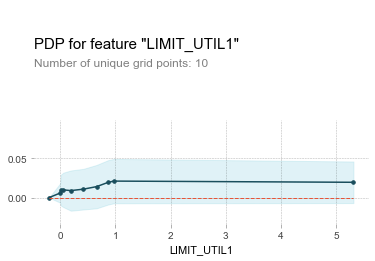

In [34]:
pdp_goals_rf = pdp.pdp_isolate(model=rf_model, dataset=X_test_ros, 
                            model_features=X_test_ros.columns, 
                            feature='LIMIT_UTIL1')

# plot it
fig_limit_util_rf, _ = pdp.pdp_plot(pdp_goals_rf, 'LIMIT_UTIL1', 
                                    figsize=(6,4))
fig_limit_util_rf.savefig('pdp_limitutil1_rf.png')
plt.show()

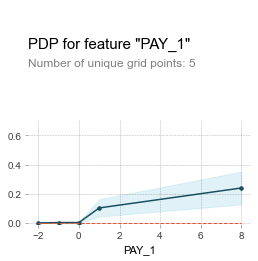

In [14]:
pdp_pay1_rf = pdp.pdp_isolate(model=rf_model, dataset=X_test_ros, 
                            model_features=X_test_ros.columns, 
                            feature='PAY_1')

# plot it
fig_pay1_rf, _ = pdp.pdp_plot(pdp_pay1_rf, 'PAY_1', figsize=(4,4))
fig_pay1_rf.savefig('pdp_pay1_rf.png')
plt.show()

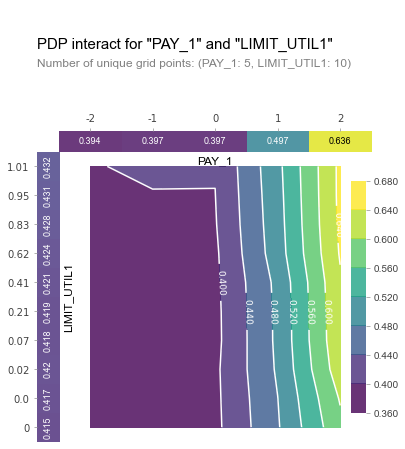

In [15]:
inter1_rf = pdp.pdp_interact(model=rf_model,
                          dataset=X_test_ros,
                          model_features=X_test_ros.columns,
                          features=['PAY_1', 'LIMIT_UTIL1'],
                          num_grid_points=[10, 10],
                          percentile_ranges=[(5, 95), (5, 95)])
fig_inter1_rf, axes = pdp.pdp_interact_plot(pdp_interact_out=inter1_rf,
                                  feature_names=['PAY_1', 'LIMIT_UTIL1'],
                                  plot_type='contour',
                                  x_quantile=True,
                                  plot_pdp=True,
                                  figsize=(6,8))
fig_inter1_rf.savefig('pdp2_Pay1_LimitUtil1_rf.png')

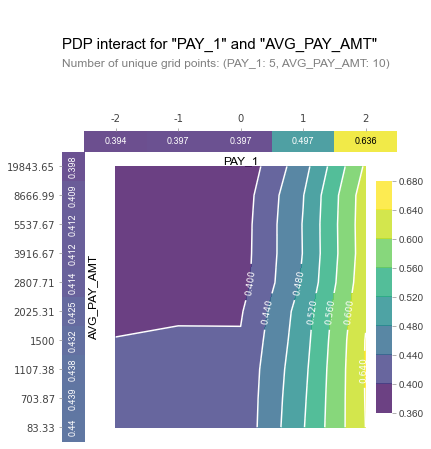

In [16]:
inter2_rf = pdp.pdp_interact(model=rf_model,
                          dataset=X_test_ros,
                          model_features=X_test_ros.columns,
                          features=['PAY_1', 'AVG_PAY_AMT'],
                          num_grid_points=[10, 10],
                          percentile_ranges=[(5, 95), (5, 95)])
fig_inter2_rf, axes = pdp.pdp_interact_plot(pdp_interact_out=inter2_rf,
                                  feature_names=['PAY_1', 'AVG_PAY_AMT'],
                                  plot_type='contour',
                                  x_quantile=True,
                                  plot_pdp=True,
                                  figsize=(6,8))
fig_inter2_rf.savefig('pdp2_Pay1_AvgPay_rf.png')

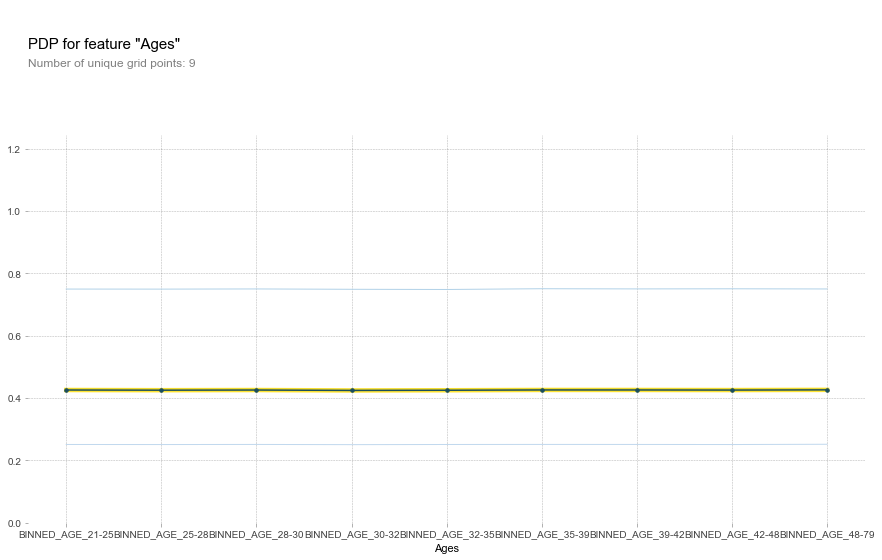

In [33]:
age_columns = ['BINNED_AGE_21-25', 'BINNED_AGE_25-28', 'BINNED_AGE_28-30', 'BINNED_AGE_30-32', 
               'BINNED_AGE_32-35', 'BINNED_AGE_35-39', 'BINNED_AGE_39-42', 'BINNED_AGE_42-48',
               'BINNED_AGE_48-79']
pdp_age_rf = pdp.pdp_isolate(
    model=rf_model, dataset=X_test_ros, model_features=X_test_ros.columns, 
    feature=age_columns
)
fig_age_rf, axes = pdp.pdp_plot(pdp_age_rf,'Ages', center=False, cluster=True,n_cluster_centers=3,
                         plot_lines=True, x_quantile=True, show_percentile=True)
fig_age_rf.savefig('pdp_all_ages_rf.png')

## Logistic Regression

In [18]:
lr_model = joblib.load('logreg.sav')
result = roc_auc_score(y_test_ros, lr_model.predict(X_test_ros))
print(result)

0.6744032337271181


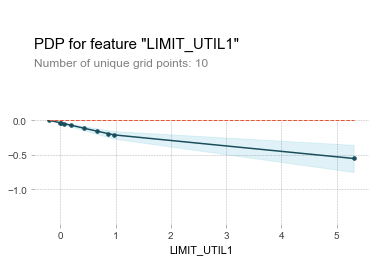

In [19]:
pdp_goals_lr = pdp.pdp_isolate(model=lr_model, dataset=X_test_ros, 
                            model_features=X_test_ros.columns, 
                            feature='LIMIT_UTIL1')

# plot it
fig_limit_util_lr, _ = pdp.pdp_plot(pdp_goals_lr, 'LIMIT_UTIL1', figsize=(6,4))
fig_limit_util_lr.savefig('pdp_limitutil1_lr.png')
plt.show()

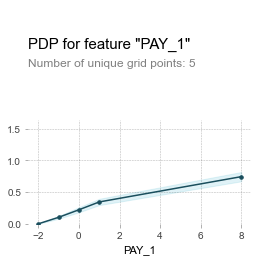

In [20]:
pdp_pay1_lr = pdp.pdp_isolate(model=lr_model, dataset=X_test_ros, 
                            model_features=X_test_ros.columns, 
                            feature='PAY_1')

# plot it
fig_pay1_lr, _ = pdp.pdp_plot(pdp_pay1_lr, 'PAY_1', figsize=(4,4))
fig_pay1_lr.savefig('pdp_pay1_lr.png')
plt.show()

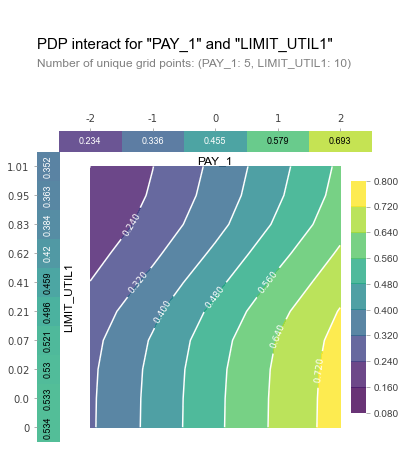

In [21]:
inter1_lr = pdp.pdp_interact(model=lr_model,
                              dataset=X_test_ros,
                              model_features=X_test_ros.columns,
                              features=['PAY_1', 'LIMIT_UTIL1'],
                              num_grid_points=[10, 10],
                              percentile_ranges=[(5, 95), (5, 95)])
fig_inter1_lr, axes = pdp.pdp_interact_plot(pdp_interact_out=inter1_lr,
                                  feature_names=['PAY_1', 'LIMIT_UTIL1'],
                                  plot_type='contour',
                                  x_quantile=True,
                                  plot_pdp=True,
                                  figsize=(6,8))
fig_inter1_lr.savefig('pdp2_Pay1_LimitUtil1_lr.png')

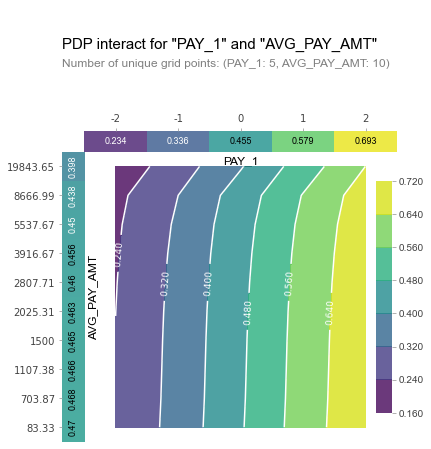

In [22]:
inter2_lr = pdp.pdp_interact(model=lr_model,
                          dataset=X_test_ros,
                          model_features=X_test_ros.columns,
                          features=['PAY_1', 'AVG_PAY_AMT'],
                          num_grid_points=[10, 10],
                          percentile_ranges=[(5, 95), (5, 95)])
fig_inter2_lr, axes = pdp.pdp_interact_plot(pdp_interact_out=inter2_lr,
                                  feature_names=['PAY_1', 'AVG_PAY_AMT'],
                                  plot_type='contour',
                                  x_quantile=True,
                                  plot_pdp=True,
                                  figsize=(6,8))
fig_inter2_lr.savefig('pdp2_Pay1_AvgPay_lr.png')

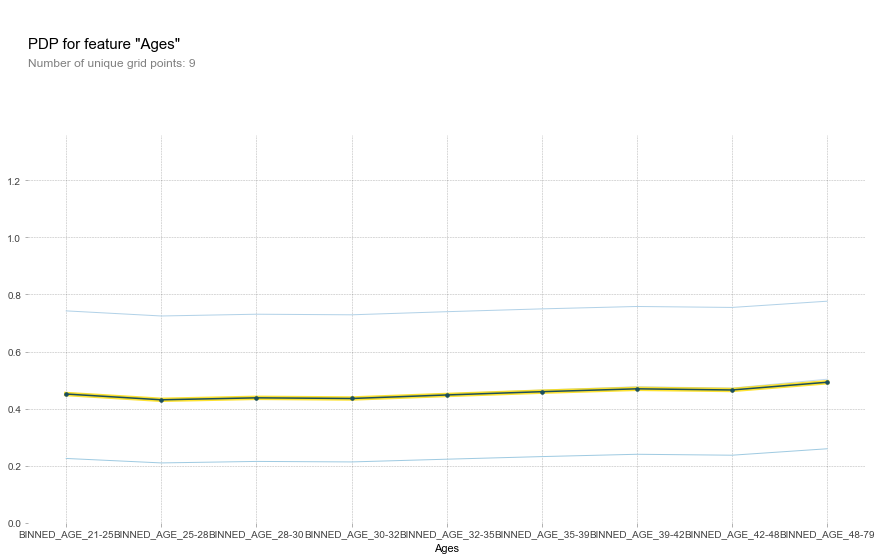

In [32]:
pdp_age_lr = pdp.pdp_isolate(
    model=lr_model, dataset=X_test_ros, model_features=X_test_ros.columns, 
    feature=age_columns
)
fig_age_lr, axes = pdp.pdp_plot(pdp_age_lr,'Ages', center=False, cluster=True,n_cluster_centers=3,
                         plot_lines=True, x_quantile=True, show_percentile=True)
fig_age_lr.savefig('pdp_all_ages_lr.png')